In [ ]:
!pip install powerlaw
!pip install networkx==1.10
!pip install matplotlib==2.2.3
!pip install pycountry

## Collecting the data

In [ ]:
import requests                                             # For requesting json data from the url
import pandas as pd                                         # pandas dataframes used for convenience
import numpy as np
import os
import pycountry
import plotly.express as px

In [ ]:
#import zipfile
#with zipfile.ZipFile("/content/drive/MyDrive/Network Science - Data/BACI_HS07_V202001.zip", 'r') as zip_ref:
#    zip_ref.extractall("/content/drive/MyDrive/Network Science - Data")

## Clean the Data

In [ ]:
BECcodes = {'Coffee':[90111,90112,90121,90190],
            'Oil':[2709,2710,2711,2713,2707],
            'Petroleum oil':[271111],
             'Natural gas':[271121],
            'Gaseous oil':[270900]}

In [ ]:
hs6_codes = []
for i in BECcodes.values():
  hs6_codes.extend(i)

hs6_codes

In [ ]:
# Create a dictionary of iso2 country codes 
iso2 = pd.read_csv('/content/drive/MyDrive/Network Science Package/country_code_baci07.csv', index_col='i', encoding = "ISO-8859-1",keep_default_na=False, na_values=[''])['iso2'].to_dict()

In [ ]:
# Just needed in case you'd like to append it to an array
data = []
local_download_path = "/content/drive/MyDrive/Network Science - Data"
for filename in os.listdir(local_download_path):
    if filename.endswith("csv"): 
        data.append(filename)

In [ ]:
data[0].split('.')

['BACI_HS07_Y2007_V202001', 'csv']

In [ ]:
for i in data:                      # start year & end year + 1 
    df = pd.read_csv("/content/drive/MyDrive/Network Science - Data/"+i, index_col='t')  
    df=df[df['k'].isin(hs6_codes)]  
            
    for v in ['i', 'j']:
        df[v] = df[v].apply(lambda x: iso2.get(x,x))     # replace country names
    df = df.dropna(axis=0) 
    y=i.split('.')[0]  
                   
    cleanfile = y+'_clean.csv'         
    df.to_csv("/content/drive/MyDrive/Cleaned Data/"+cleanfile, index=False, float_format='%g') # save as csv

## Relationship between Economic Networks and Power Law

In [ ]:
import pandas as pd
import networkx as nx
import powerlaw
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pl_ = {}
prod = 90111
df = pd.read_csv('/content/drive/MyDrive/Cleaned Data/BACI_HS07_Y2014_V202001_clean.csv', index_col='k').sort_index()
G_coffee = nx.from_pandas_dataframe(df.loc[prod], 'i', 'j', 'v', nx.DiGraph())  #build network
deg = G_coffee.out_degree(weight='v').values()         # calc weighted outdeg for each country
fit = powerlaw.Fit(list(deg))         # est. distrib. and save alpha value

Text(0.5,1,'Trade Network of Coeffe in 2014')

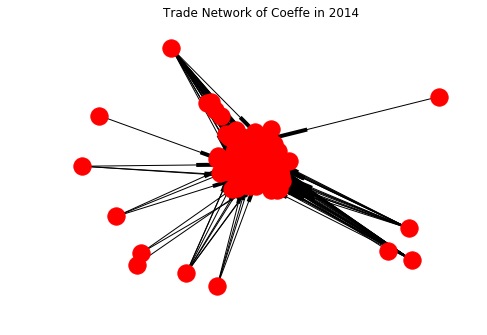

In [ ]:
nx.draw(G_coffee)
plt.title("Trade Network of Coeffe in 2014")

Text(0,0.5,'P$(X)>x$')

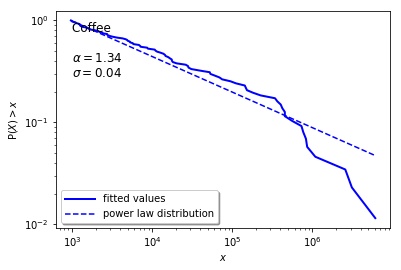

In [ ]:
fig2 = fit.plot_ccdf(label='fitted values', color='b', linewidth=2)
fit.power_law.plot_ccdf(label='power law distribution', color='b', linestyle='--', ax=fig2)
plt.legend(handlelength=3, fancybox=True, shadow=True, loc=3, prop={'size':10})
fig2.text(0.05, 0.95, 'Coffee \n \n$\\alpha = 1.34$ \n$\\sigma = 0.04$', transform=fig2.transAxes, fontsize=12,
        verticalalignment='top')
fig2.set_xlabel('$x$')
fig2.set_ylabel('P$(X)>x$')

In [ ]:
pl_ = {}
prod = 271111
df = pd.read_csv('/content/drive/MyDrive/Cleaned Data/BACI_HS07_Y2014_V202001_clean.csv', index_col='k').sort_index()
G_oil = nx.from_pandas_dataframe(df.loc[prod], 'i', 'j', 'v', nx.DiGraph())  #build network
deg = G_oil.out_degree(weight='v').values()         # calc weighted outdeg for each country
fit = powerlaw.Fit(list(deg))         # est. distrib. and save alpha valu

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [ ]:
print('Alpha: ', fit.power_law.alpha)
print( 'Sigma: ', fit.power_law.sigma)
print('X-Min: ', fit.power_law.xmin)

Alpha:  2.2277549691781666
Sigma:  0.3405179611598146
X-Min:  3830800.0


Text(0.5,1,'Trade Network of Oil in 2014')

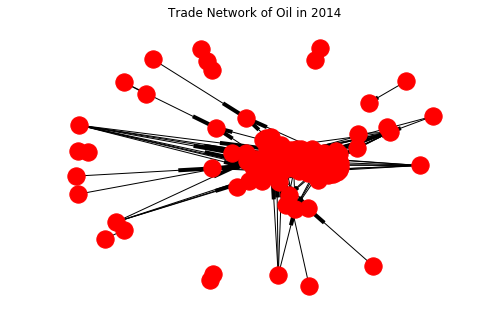

In [ ]:
nx.draw(G_oil)
plt.title("Trade Network of Oil in 2014")

Text(0,0.5,'P$(X)>x$')

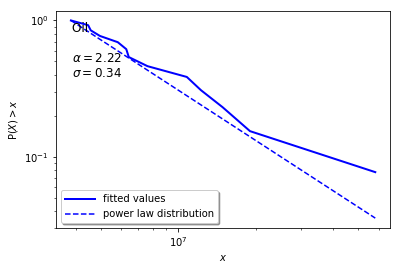

In [ ]:
fig2 = fit.plot_ccdf(label='fitted values', color='b', linewidth=2)
fit.power_law.plot_ccdf(label='power law distribution', color='b', linestyle='--', ax=fig2)
plt.legend(handlelength=3, fancybox=True, shadow=True, loc=3, prop={'size':10})
fig2.text(0.05, 0.95, 'Oil \n \n$\\alpha = 2.22$ \n$\\sigma = 0.34$', transform=fig2.transAxes, fontsize=12,
        verticalalignment='top')
fig2.set_xlabel('$x$')
fig2.set_ylabel('P$(X)>x$')

In [ ]:
pl_ = {}
prod = 90111
df = pd.read_csv('/content/drive/MyDrive/Cleaned Data/BACI_HS07_Y2014_V202001_clean.csv', index_col='k').sort_index()
df = df[df['i']=='IN']

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.


Text(0.5,1,'Trade Network of Oil in 2014')

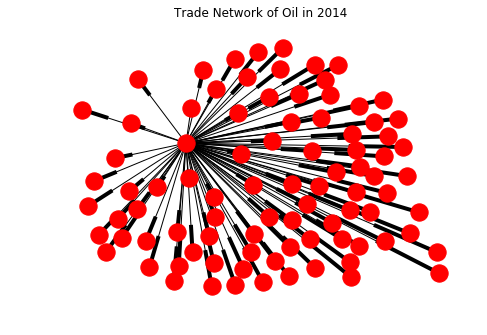

In [ ]:
G_coffee_in = nx.from_pandas_dataframe(df.loc[prod], 'i', 'j', 'v', nx.DiGraph())  #build network
deg = G_coffee_in.out_degree(weight='v').values()         # calc weighted outdeg for each country
fit = powerlaw.Fit(list(deg))
nx.draw(G_coffee_in)
plt.title("Trade Network of Oil in 2014")

## Centrality Growth in the Economic Networks

In [ ]:
centrality_oil = nx.eigenvector_centrality(G_oil)
centrality_coffee = nx.eigenvector_centrality(G_coffee)

In [ ]:
oil_trade=pd.DataFrame()
oil_trade['Country'] = centrality_oil.keys()
oil_trade['values'] = centrality_oil.values()
oil_trade = oil_trade.dropna()

In [ ]:
coffee_trade=pd.DataFrame()
coffee_trade['Country'] = centrality_coffee.keys()
coffee_trade['values'] = centrality_coffee.values()
coffee_trade = coffee_trade.dropna()

In [ ]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def encode(df):
    try:
      if (len(df['Country'])==2 and df['Country'] in list_alpha_2):
         return pycountry.countries.get(alpha_2=df['Country']).name
      elif (len(df['Country'])==3 and df['Country'] in list_alpha_3):
          return pycountry.countries.get(alpha_3=df['Country']).name
      else:
          return 'Invalid Code'
    except:
      return df


oil_trade['Country']=oil_trade.apply(encode, axis = 1)
coffee_trade['Country']=coffee_trade.apply(encode, axis = 1)

In [ ]:
oil_trade = oil_trade.dropna()
coffee_trade = coffee_trade.dropna()

In [ ]:
exp_df = pd.read_csv("/content/drive/MyDrive/Network Science Package/Export.csv")
fig = px.choropleth(exp_df, locations=exp_df.columns[0],
                    locationmode='country names',
                    color=exp_df.columns[1],
                   color_continuous_scale='Reds')
fig.update_layout(title="Export growth of Countries")
fig.show()

In [ ]:
fig = px.choropleth(coffee_trade, locations='Country',
                    locationmode='country names',
                    color="values",
                   color_continuous_scale='Reds')
fig.update_layout(title="Coffee Trade Centrailty growth")
fig.show()

In [ ]:
fig = px.choropleth(oil_trade, locations='Country',
                    locationmode='country names',
                    color="values",
                   color_continuous_scale='Reds')
fig.update_layout(title="Oil Trade Centrailty growth")
fig.show()

## Oil Trade over the years

In [ ]:
oil_df = pd.read_csv("/content/drive/MyDrive/Network Science Package/oil_data.csv")

In [ ]:
years = [oil_df['Year'].str.split('-')]
temp = [2008]
for i in range(1,len(years[0])):
  temp.append(int(years[0][i][2]))
oil_df['Year']=temp

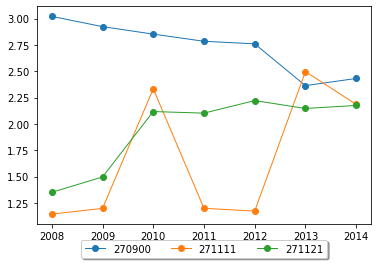

In [ ]:
oil_df1=oil_df.reset_index().set_index(['Year','hs6']).unstack()['alpha']

oil_df1.plot(linewidth=1, marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)

## Oil Vs Other Products

In [ ]:
# Just needed in case you'd like to append it to an array
data = []
local_download_path = "/content/drive/MyDrive/Network Science - Data"
for filename in os.listdir(local_download_path):
    if filename.endswith("csv"): 
        data.append(local_download_path+'/'+filename)

In [ ]:
df_2007 = pd.read_csv(data[0])
df_2008 = pd.read_csv(data[1])
df_2009 = pd.read_csv(data[2])
df_2010 = pd.read_csv(data[3])
df_2011 = pd.read_csv(data[4])
df_2012 = pd.read_csv(data[5])

In [ ]:
oil_07 = df_2007[df_2007['k'].isin([270900,271111,271121])]
oil_08 = df_2008[df_2008['k'].isin([270900,271111,271121])]
oil_09 = df_2009[df_2009['k'].isin([270900,271111,271121])]
oil_10 = df_2010[df_2010['k'].isin([270900,271111,271121])]
oil_11 = df_2011[df_2011['k'].isin([270900,271111,271121])]
oil_12 = df_2012[df_2012['k'].isin([270900,271111,271121])]

In [ ]:
trade_07 = df_2007[~df_2007['k'].isin([270900,271111,271121])]
trade_08 = df_2008[~df_2008['k'].isin([270900,271111,271121])]
trade_09 = df_2009[~df_2009['k'].isin([270900,271111,271121])]
trade_10 = df_2010[~df_2010['k'].isin([270900,271111,271121])]
trade_11 = df_2011[~df_2011['k'].isin([270900,271111,271121])]
trade_12 = df_2012[~df_2012['k'].isin([270900,271111,271121])]

In [ ]:
trade_07['year']=2007
trade_08['year']=2008
trade_09['year']=2009
trade_10['year']=2010
trade_11['year']=2011
trade_12['year']=2012

oil_07['year']=2007
oil_08['year']=2008
oil_09['year']=2009
oil_10['year']=2010
oil_11['year']=2011
oil_12['year']=2012

In [ ]:
trade_df = trade_07.append(trade_08)
trade_df = trade_df.append(trade_09)
trade_df = trade_df.append(trade_10)
trade_df = trade_df.append(trade_11)
trade_df = trade_df.append(trade_12)

oil_df = oil_07.append(oil_08)
oil_df = oil_df.append(oil_09)
oil_df = oil_df.append(oil_10)
oil_df = oil_df.append(oil_11)
oil_df = oil_df.append(oil_12)

In [ ]:
trade_ = trade_df
trade_.index = trade_df.year
oil_ = oil_df
oil_.index = oil_df.year

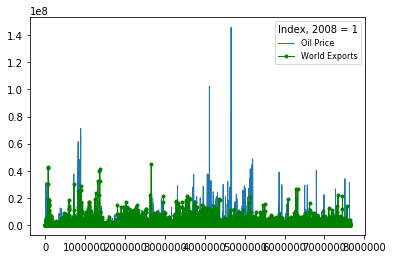

In [ ]:
plt.plot(oil_df['v'], label='Oil Price', linewidth=1)
plt.plot(trade_df['v'], label='World Exports', linewidth=1, color='g', marker='.')
plt.legend(title='Index 2007 - 2012', loc=1, prop={'size':8})

## Import Vs Export of oils

In [ ]:
iso2 = pd.read_csv('/content/drive/MyDrive/Network Science Package/country_code_baci07.csv', index_col='i', encoding = "ISO-8859-1",keep_default_na=False, na_values=[''])['iso2'].to_dict()
        
for v in ['i', 'j']:
  oil_df[v] = oil_df[v].apply(lambda x: iso2.get(x,x))     # replace country names
  oil_df = oil_df.dropna(axis=0) 


In [ ]:
oil_df = oil_df.drop(columns=['q'])

In [ ]:
countries = ['US','CN','GB','IN','AU']
Import_df = oil_df[oil_df['i'].isin(countries)]
Export_df = oil_df[oil_df['j'].isin(countries)]

In [ ]:
Import_df = Import_df.drop(columns='year').groupby(['k','i','t']).sum()
Import_df = Import_df.reset_index(level=['k','i','t'])

Export_df = Export_df.drop(columns='year').groupby(['k','j','t']).sum()
Export_df = Export_df.reset_index(level=['k','j','t'])

In [ ]:
Export_df

,k,j,t,v
0,270900,AU,2007,1.143105e+07
1,270900,AU,2008,1.398376e+07
2,270900,AU,2009,9.208396e+06
3,270900,AU,2010,1.447034e+07
4,270900,AU,2011,2.010090e+07
...,...,...,...,...
81,271121,US,2008,2.736798e+07
82,271121,US,2009,1.236599e+07
83,271121,US,2010,1.446371e+07
84,271121,US,2011,1.178712e+07


In [ ]:
t = Export_df[Export_df['k']==270900]
t.set_index(['t','j']).unstack()['v']

j,AU,CN,GB,IN,US
t,,,,,
2007,1.143105e+07,7.060727e+07,2.327774e+07,8.132953e+05,2.299103e+08
2008,1.398376e+07,1.164841e+08,3.633852e+07,4.358777e+06,3.349911e+08
2009,9.208396e+06,7.947525e+07,2.115537e+07,5.920217e+07,1.825324e+08
2010,1.447034e+07,1.240588e+08,2.860929e+07,8.038036e+07,2.464292e+08
2011,2.010090e+07,1.803386e+08,4.218573e+07,1.124781e+08,3.150784e+08
2012,2.054093e+07,2.004766e+08,4.370288e+07,1.357059e+08,2.992564e+08


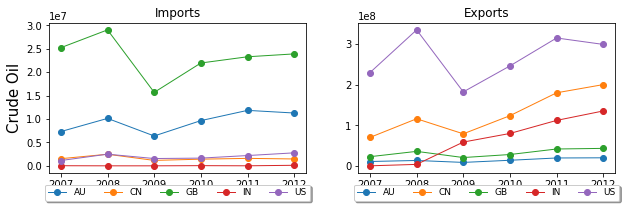

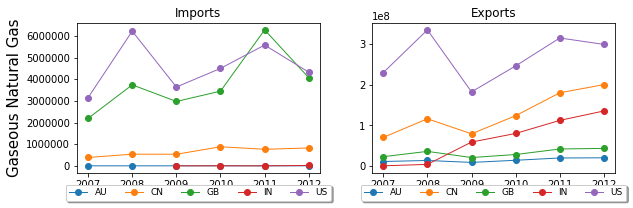

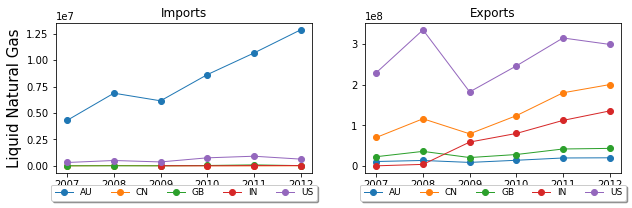

In [ ]:
prods = {270900:'Crude Oil', 271121: 'Gaseous Natural Gas', 271111: 'Liquid Natural Gas'}
for prod, prodid in prods.items():
    # Importers
    t = Import_df[Import_df['k']==prod]
    t = t.set_index(['t','i']).unstack()['v']

    # Exporters
    t_ = Export_df[Export_df['k']==270900]
    t_ = t_.set_index(['t','j']).unstack()['v']   

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))

    ax1.plot(t,linewidth=1, marker='o')
    ax1.set_title('Imports')
    ax1.legend(t, loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5, fontsize=9)
    ax1.set_ylabel(prodid, fontsize=15)

    ax2.plot(t_,linewidth=1, marker='o')
    ax2.set_title('Exports')
    ax2.legend(t_, loc='upper center', bbox_to_anchor=(0.5, -0.05),
        fancybox=True, shadow=True, ncol=5, fontsize=9)

    plt.tight_layout()